In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [228]:
import requests
import tqdm
from time import sleep
from PIL import Image
from io import BytesIO
from adjustText import adjust_text
from scipy.stats import binned_statistic_2d
from bokeh.plotting import figure
from math import pi

In [229]:
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.players import get_players
from nba_api.stats.static.teams import get_teams
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playerdashptshotdefend import PlayerDashPtShotDefend
from nba_api.stats.endpoints.cumestatsplayergames import CumeStatsPlayerGames
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

In [230]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2
from nba_api.stats.endpoints.cumestatsteamgames import CumeStatsTeamGames

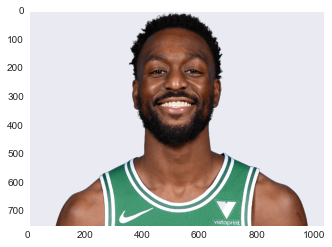

In [231]:
import urllib.request
# we pass in the link to the image as the 1st argument
# the 2nd argument tells urlretrieve what we want to scrape
pic = urllib.request.urlretrieve("https://cdn.nba.com/headshots/nba/latest/1040x760/202689.png")

# urlretrieve returns a tuple with our image as the first 
# element and imread reads in the image as a 
# mutlidimensional numpy array so matplotlib can plot it
kemba_pic = plt.imread(pic[0])

# plot the image
plt.imshow(kemba_pic)
plt.show()

In [232]:
plt.style.use('fivethirtyeight')

In [233]:
all_players = get_players()
df_all_players = pd.DataFrame(data=all_players, columns=['id', 'full_name','first_name', 'last_name', 'is_active'])
df_all_players.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [234]:
all_teams = get_teams()
df_all_teams = pd.DataFrame(data=all_teams, columns=['id', 'full_name', 'abbreviation', 'nickname', 'city', 'state', 
                                                     'year_founded'])
df_all_teams.head()                    

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [235]:
boston_id = df_all_teams[df_all_teams.full_name == 'Boston Celtics']['id']

In [236]:
kemba_id = df_all_players[df_all_players['full_name'] == 'Kemba Walker']['id']

In [237]:
team_stats = CumeStatsTeamGames(team_id=boston_id, league_id='00', season='2019-20', season_type_all_star='Regular Season')
team_stats.get_data_frames()[0]

,MATCHUP,GAME_ID
0,08/13/2020 Wizards at Celtics,0021901308
1,08/11/2020 Celtics at Grizzlies,0021901301
2,08/09/2020 Magic at Celtics,0021901288
3,08/07/2020 Celtics at Raptors,0021901279
4,08/05/2020 Nets at Celtics,0021901267
...,...,...
67,11/01/2019 Knicks at Celtics,0021900072
68,10/30/2019 Bucks at Celtics,0021900058
69,10/26/2019 Celtics at Knicks,0021900029
70,10/25/2019 Raptors at Celtics,0021900017


In [238]:
import matplotlib.font_manager as fm
from matplotlib.patches import Circle, Rectangle, Arc, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage

In [239]:
shot_detail = ShotChartDetail(player_id=kemba_id, 
              team_id=boston_id, context_measure_simple = 'FGA',     
              season_type_all_star='Playoffs', season_nullable='2019-20')
kemba_shots_df = shot_detail.get_data_frames()[0]

In [240]:
kemba_shots_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0041900121,12,202689,Kemba Walker,1610612738,Boston Celtics,1,11,0,...,Center(C),24+ ft.,26,-11,267,1,0,20200817,BOS,PHI
1,Shot Chart Detail,0041900121,38,202689,Kemba Walker,1610612738,Boston Celtics,1,8,54,...,Center(C),Less Than 8 ft.,1,-10,-4,1,1,20200817,BOS,PHI
2,Shot Chart Detail,0041900121,52,202689,Kemba Walker,1610612738,Boston Celtics,1,6,47,...,Center(C),24+ ft.,25,-69,246,1,0,20200817,BOS,PHI
3,Shot Chart Detail,0041900121,72,202689,Kemba Walker,1610612738,Boston Celtics,1,4,35,...,Left Side(L),8-16 ft.,15,-97,115,1,0,20200817,BOS,PHI
4,Shot Chart Detail,0041900121,217,202689,Kemba Walker,1610612738,Boston Celtics,2,7,7,...,Right Side Center(RC),16-24 ft.,19,95,166,1,1,20200817,BOS,PHI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Shot Chart Detail,0041900306,507,202689,Kemba Walker,1610612738,Boston Celtics,4,8,27,...,Right Side Center(RC),24+ ft.,25,144,208,1,0,20200927,MIA,BOS
252,Shot Chart Detail,0041900306,550,202689,Kemba Walker,1610612738,Boston Celtics,4,5,14,...,Left Side Center(LC),24+ ft.,24,-217,124,1,0,20200927,MIA,BOS
253,Shot Chart Detail,0041900306,563,202689,Kemba Walker,1610612738,Boston Celtics,4,4,16,...,Left Side Center(LC),24+ ft.,25,-109,235,1,0,20200927,MIA,BOS
254,Shot Chart Detail,0041900306,625,202689,Kemba Walker,1610612738,Boston Celtics,4,0,39,...,Right Side Center(RC),24+ ft.,26,215,161,1,1,20200927,MIA,BOS


In [241]:
kemba_shots_df.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM'],
      dtype='object')

In [242]:
kemba_shots_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GRID_TYPE            256 non-null    object
 1   GAME_ID              256 non-null    object
 2   GAME_EVENT_ID        256 non-null    int64 
 3   PLAYER_ID            256 non-null    int64 
 4   PLAYER_NAME          256 non-null    object
 5   TEAM_ID              256 non-null    int64 
 6   TEAM_NAME            256 non-null    object
 7   PERIOD               256 non-null    int64 
 8   MINUTES_REMAINING    256 non-null    int64 
 9   SECONDS_REMAINING    256 non-null    int64 
 10  EVENT_TYPE           256 non-null    object
 11  ACTION_TYPE          256 non-null    object
 12  SHOT_TYPE            256 non-null    object
 13  SHOT_ZONE_BASIC      256 non-null    object
 14  SHOT_ZONE_AREA       256 non-null    object
 15  SHOT_ZONE_RANGE      256 non-null    object
 16  SHOT_DIS

In [243]:
kemba_shots_df_categorical = kemba_shots_df.select_dtypes(include=['category', 'object'])

In [244]:
for i in kemba_shots_df_categorical:
    print(kemba_shots_df_categorical[i].value_counts())

Shot Chart Detail    256
Name: GRID_TYPE, dtype: int64
0041900123    20
0041900302    19
0041900301    19
0041900212    18
0041900121    16
0041900122    16
0041900303    16
0041900217    16
0041900213    15
0041900215    15
0041900306    15
0041900124    15
0041900304    14
0041900211    11
0041900216    11
0041900305    11
0041900214     9
Name: GAME_ID, dtype: int64
Kemba Walker    256
Name: PLAYER_NAME, dtype: int64
Boston Celtics    256
Name: TEAM_NAME, dtype: int64
Missed Shot    143
Made Shot      113
Name: EVENT_TYPE, dtype: int64
Pullup Jump shot                   109
Jump Shot                           59
Step Back Jump shot                 23
Driving Layup Shot                  15
Driving Finger Roll Layup Shot      12
Running Layup Shot                  11
Driving Floating Jump Shot           7
Running Pull-Up Jump Shot            4
Turnaround Fadeaway shot             4
Fadeaway Jump Shot                   3
Driving Floating Bank Jump Shot      2
Driving Reverse Layup Shot

# Shots in Playoffs in 2019-20

In [245]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

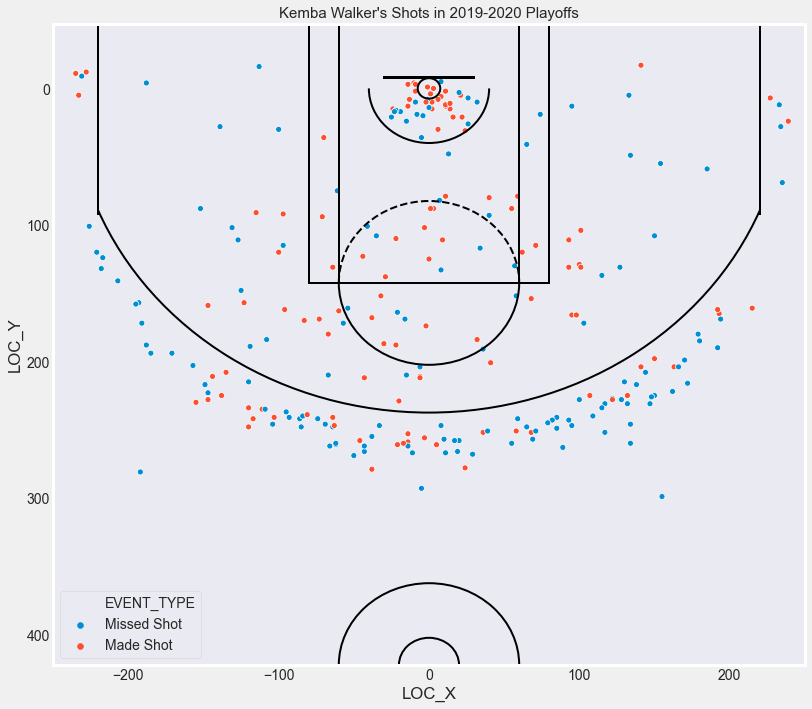

In [246]:
plt.figure(figsize=(12,11))
sns.set_style("dark")
sns.set_color_codes('dark')
sns.scatterplot(kemba_shots_df.LOC_X, kemba_shots_df.LOC_Y, data=kemba_shots_df, hue=kemba_shots_df.EVENT_TYPE)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.title('Kemba Walker\'s Shots in 2019-2020 Playoffs', fontsize=15)
plt.legend()
plt.show()

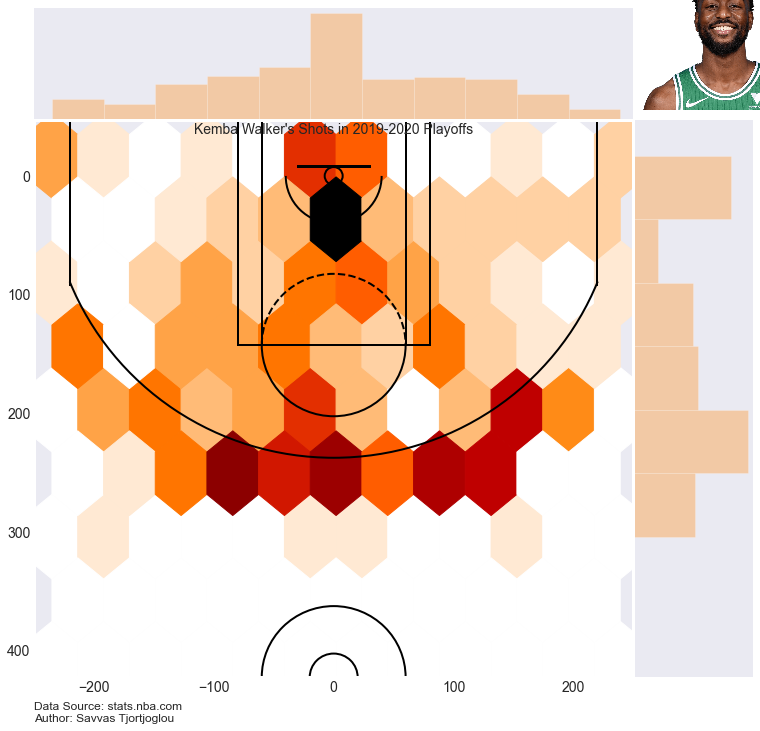

In [247]:
# create our jointplot

cmap=plt.cm.gist_heat_r
joint_shot_chart = sns.jointplot(kemba_shots_df.LOC_X, kemba_shots_df.LOC_Y, stat_func=None,
                                 kind='hex', space=0, color=cmap(.2), cmap=cmap)

joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto 
ax = joint_shot_chart.ax_joint
draw_court(ax)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-250,250)
ax.set_ylim(422.5, -47.5)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom='off', labelleft='off')

# Add a title
ax.set_title('Kemba Walker\'s Shots in 2019-2020 Playoffs', y=1.2, fontsize=14, loc='center', pad=-14)

# Add Data Source and Author
ax.text(-250,460,'Data Source: stats.nba.com'
        '\nAuthor: Savvas Tjortjoglou', fontsize=12)

# Add Kemba Walker's image to the top right
img = OffsetImage(kemba_pic, zoom=0.19)
img.set_offset((625,621))
ax.add_artist(img)

plt.show()

# Shots in Regular Season in 2019-20

In [248]:
shot_detail = ShotChartDetail(player_id=kemba_id, 
              team_id=boston_id, context_measure_simple = 'FGA',     
              season_type_all_star='Regular Season', season_nullable='2019-20')
kemba_shots_regular_df = shot_detail.get_data_frames()[0]

In [249]:
kemba_shots_regular_df

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021900008,21,202689,Kemba Walker,1610612738,Boston Celtics,1,10,27,...,Right Side Center(RC),24+ ft.,25,176,187,1,0,20191023,PHI,BOS
1,Shot Chart Detail,0021900008,55,202689,Kemba Walker,1610612738,Boston Celtics,1,7,25,...,Center(C),8-16 ft.,15,-58,141,1,1,20191023,PHI,BOS
2,Shot Chart Detail,0021900008,72,202689,Kemba Walker,1610612738,Boston Celtics,1,6,39,...,Center(C),24+ ft.,26,71,252,1,0,20191023,PHI,BOS
3,Shot Chart Detail,0021900008,254,202689,Kemba Walker,1610612738,Boston Celtics,2,6,54,...,Right Side Center(RC),24+ ft.,25,110,234,1,1,20191023,PHI,BOS
4,Shot Chart Detail,0021900008,270,202689,Kemba Walker,1610612738,Boston Celtics,2,5,39,...,Center(C),Less Than 8 ft.,7,2,78,1,1,20191023,PHI,BOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,Shot Chart Detail,0021901301,340,202689,Kemba Walker,1610612738,Boston Celtics,2,0,45,...,Right Side Center(RC),24+ ft.,25,171,183,1,0,20200811,MEM,BOS
885,Shot Chart Detail,0021901301,389,202689,Kemba Walker,1610612738,Boston Celtics,3,9,12,...,Right Side Center(RC),24+ ft.,25,141,213,1,0,20200811,MEM,BOS
886,Shot Chart Detail,0021901301,609,202689,Kemba Walker,1610612738,Boston Celtics,4,6,44,...,Left Side Center(LC),24+ ft.,24,-195,153,1,1,20200811,MEM,BOS
887,Shot Chart Detail,0021901301,643,202689,Kemba Walker,1610612738,Boston Celtics,4,4,20,...,Right Side Center(RC),24+ ft.,25,209,151,1,1,20200811,MEM,BOS


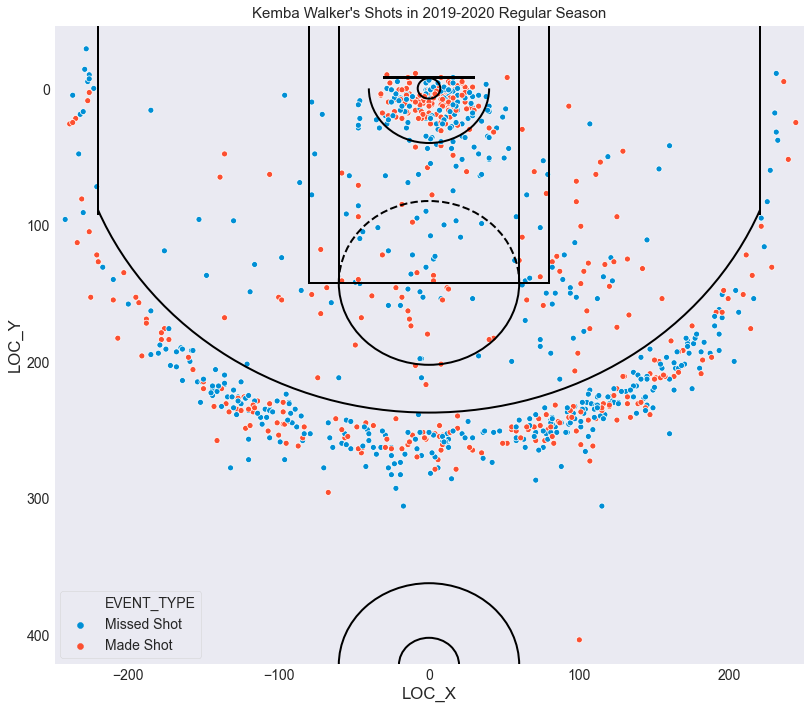

In [250]:
plt.figure(figsize=(12,11))
sns.scatterplot(kemba_shots_regular_df.LOC_X, kemba_shots_regular_df.LOC_Y, data=kemba_shots_df, 
                hue=kemba_shots_regular_df.EVENT_TYPE)
draw_court()
# Adjust plot limits to just fit in half court
plt.xlim(-250,250)
# Descending values along th y axis from bottom to top
# in order to place the hoop by the top of plot
plt.ylim(422.5, -47.5)
# get rid of axis tick labels
# plt.tick_params(labelbottom=False, labelleft=False)
plt.title('Kemba Walker\'s Shots in 2019-2020 Regular Season', fontsize=15)
plt.show()